In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pwd

'C:\\Users\\user\\Downloads\\MahdiWork\\10000-sales-records'

In [3]:
sales_records = pd.read_csv('10000 Sales Records.csv')

In [4]:
print(sales_records.shape)
sales_records.head()

(10000, 14)


,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Sub-Saharan Africa,Chad,Office Supplies,Online,L,1/27/2011,292494523,2/12/2011,4484,651.21,524.96,2920025.64,2353920.64,566105.00
1,Europe,Latvia,Beverages,Online,C,12/28/2015,361825549,1/23/2016,1075,47.45,31.79,51008.75,34174.25,16834.50
2,Middle East and North Africa,Pakistan,Vegetables,Offline,C,1/13/2011,141515767,2/1/2011,6515,154.06,90.93,1003700.90,592408.95,411291.95
3,Sub-Saharan Africa,Democratic Republic of the Congo,Household,Online,C,9/11/2012,500364005,10/6/2012,7683,668.27,502.54,5134318.41,3861014.82,1273303.59
4,Europe,Czech Republic,Beverages,Online,C,10/27/2015,127481591,12/5/2015,3491,47.45,31.79,165647.95,110978.89,54669.06


In [5]:
sales_records.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

In [6]:
sales_records.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

In [7]:
df = sales_records.copy() # making a copy of the dataset to work with

In [8]:
df['Item Type'].unique() # checking the unique Item Type in the dataframe

array(['Office Supplies', 'Beverages', 'Vegetables', 'Household',
       'Baby Food', 'Meat', 'Cereal', 'Clothes', 'Snacks',
       'Personal Care', 'Cosmetics', 'Fruits'], dtype=object)

In [9]:
len(df['Order ID'].unique()) == df.shape[0] # checking for duplicate in Order ID because it is most likely the primary key

True

### confirmed! there are no duplicates in Order ID

## 1.0 Item Type and Channel

In [10]:
by_item_channel = df.groupby(['Item Type', 'Sales Channel']).count()['Order ID']

In [11]:
by_item_channel.to_frame()

Order ID
Item Type       Sales Channel          
Baby Food       Offline             406
                Online              436
Beverages       Offline             381
                Online              401
Cereal          Offline             385
                Online              440
Clothes         Offline             451
                Online              421
Cosmetics       Offline             415
                Online              419
Fruits          Offline             375
                Online              420
Household       Offline             445
                Online              430
Meat            Offline             401
                Online              397
Office Supplies Offline             406
                Online              431
Personal Care   Offline             433
                Online              455
Snacks          Offline             406
                Online              410
Vegetables      Offline             435
                Online              401

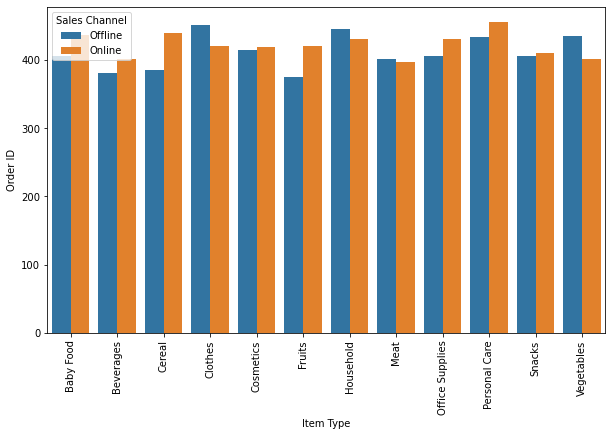

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Item Type', hue='Sales Channel', y='Order ID', data=by_item_channel.reset_index())
plt.xticks(rotation=90)
plt.show()

## 2.0 Total revenue from sales of office supplies

In [13]:
print('Total revenue from sales of office supplies is {}'.format(\
                                                        df[df['Item Type'] == 'Office Supplies']['Total Revenue'].sum()))

Total revenue from sales of office supplies is 2683156468.23


## 3.0 Total profit made from each sales channel

In [14]:
channels_revenue = df.groupby('Sales Channel').sum()['Total Revenue']
channels_revenue.to_frame()

,Total Revenue
Sales Channel,
Offline,6.675704e+09
Online,6.657847e+09


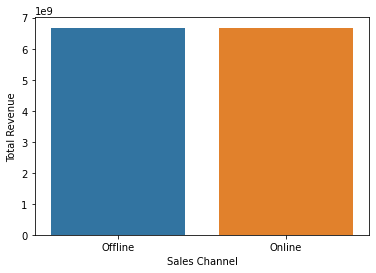

In [15]:
sns.barplot(x='Sales Channel', y='Total Revenue', data=channels_revenue.reset_index())
plt.show()

## 4.0 Total beverage orders from Asia

In [16]:
df['Region'].unique()

array(['Sub-Saharan Africa', 'Europe', 'Middle East and North Africa',
       'Asia', 'Central America and the Caribbean',
       'Australia and Oceania', 'North America'], dtype=object)

In [17]:
print('Total beverage orders from Asia is {}'.format(\
                df[(df['Region'] == 'Asia') & (df['Item Type'] == 'Beverages')]['Units Sold'].sum()))

Total beverage orders from Asia is 552183


## 5.0 Most profitable region

In [18]:
most_profitable_region = df.groupby('Region').sum()['Total Profit'].sort_values(ascending=False)
most_profitable_region.to_frame()

,Total Profit
Region,
Europe,1.027000e+09
Sub-Saharan Africa,9.996421e+08
Asia,5.874033e+08
Middle East and North Africa,5.099239e+08
Central America and the Caribbean,4.033578e+08
Australia and Oceania,3.240712e+08
North America,9.949552e+07


In [19]:
print('most profitable region is {} with a total profit of {} which makes {}% of the total profit across all regions'.format(\
      most_profitable_region.index[0], round(most_profitable_region[0], 3), round(100*most_profitable_region[0] / \
                                                                                  most_profitable_region.sum(), 3)))

most profitable region is Europe with a total profit of 1026999612.8 which makes 25.994% of the total profit across all regions
